In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

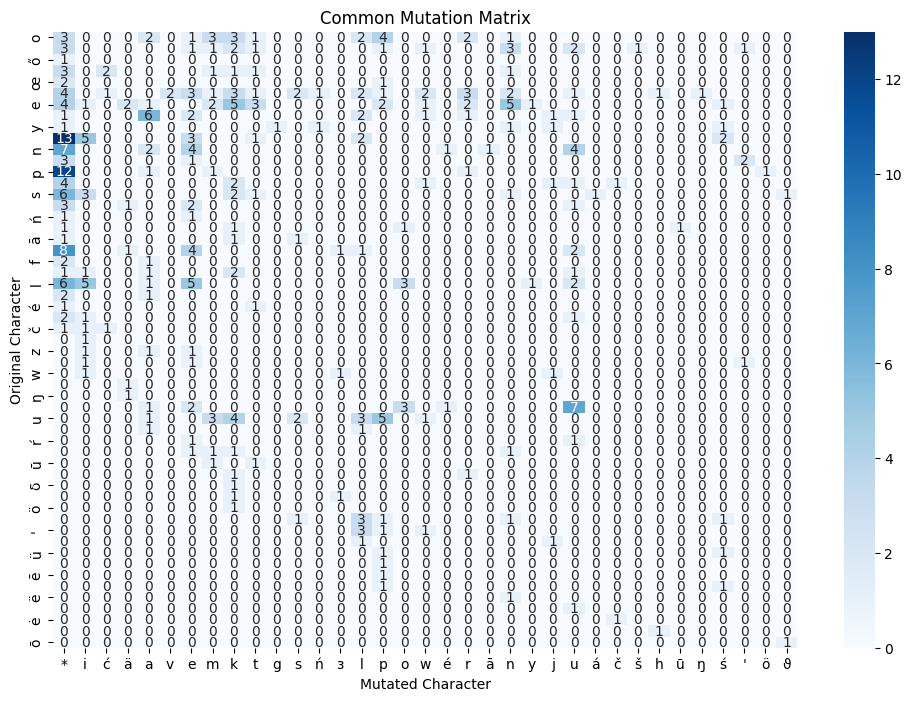

In [3]:

# Load the datasets
proto_words_path = "proto_words.csv"  # Update the path if necessary
current_words_path = "current_words.csv"
proto_words_df = pd.read_csv(proto_words_path)
current_words_df = pd.read_csv(current_words_path)

# Extract language names
languages = proto_words_df.iloc[:, 0]

# Extract numerical data (ignoring the first column which contains language names)
proto_words = proto_words_df.iloc[:, 1:].fillna('')
current_words = current_words_df.iloc[:, 1:].fillna('')

# Initialize mutation matrix
mutation_counts = defaultdict(lambda: defaultdict(int))

def compute_mutations(proto_word, current_word):
    """ Count character mutations between proto and current words."""
    for p_char, c_char in zip(proto_word, current_word):
        if p_char != c_char:
            mutation_counts[p_char][c_char] += 1

# Iterate through the data to compute mutations
for col in proto_words.columns:
    for proto_word, current_word in zip(proto_words[col], current_words[col]):
        compute_mutations(proto_word, current_word)

# Convert mutation dictionary to a DataFrame
mutation_matrix = pd.DataFrame(mutation_counts).fillna(0)

# Plot the mutation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(mutation_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Common Mutation Matrix")
plt.xlabel("Mutated Character")
plt.ylabel("Original Character")
plt.show()
